In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import warnings
from datetime import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_0 = open('StreamingHistory0.json')
file_1 = open('StreamingHistory1.json')
file_2 = open('StreamingHistory2.json')
data_0 = json.load(file_0)
data_1 = json.load(file_1)
data_2 = json.load(file_2)

all_data = [y for x in [data_0, data_1, data_2] for y in x]

In [3]:
df = pd.DataFrame.from_dict(all_data)

In [4]:
def to_snake_case(column):
    column = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', column).lower()

In [5]:
df.columns = df.columns.to_series().apply(to_snake_case)

In [6]:
df

,end_time,artist_name,track_name,ms_played
0,2021-12-10 19:42,ODIE,Phenomenon,119322
1,2021-12-11 04:49,Palace,Live Well,1300
2,2021-12-11 04:50,ODIE,Story,1834
3,2021-12-11 04:53,Emmit Fenn,Painting Greys,227368
4,2021-12-11 04:56,Oliver Tree,Hurt,145147
...,...,...,...,...
20944,2022-12-11 19:43,Gotye,Somebody That I Used To Know,244884
20945,2022-12-11 19:47,Wham!,Wake Me Up Before You Go-Go,231333
20946,2022-12-11 19:51,Chris Isaak,Wicked Game - Remastered,286880
20947,2022-12-11 19:54,Bobby Helms,Jingle Bell Rock,130973


In [7]:
df.dtypes

end_time       object
artist_name    object
track_name     object
ms_played       int64
dtype: object

In [8]:
df['min_played'] = round(df['ms_played'] // 60000, 0)
df['sec_played'] = round(df['ms_played'] / 1000, 0)
df['min_played'] = df['min_played'].astype(int)
df['sec_played'] = df['sec_played'].astype(int)
df

,end_time,artist_name,track_name,ms_played,min_played,sec_played
0,2021-12-10 19:42,ODIE,Phenomenon,119322,1,119
1,2021-12-11 04:49,Palace,Live Well,1300,0,1
2,2021-12-11 04:50,ODIE,Story,1834,0,2
3,2021-12-11 04:53,Emmit Fenn,Painting Greys,227368,3,227
4,2021-12-11 04:56,Oliver Tree,Hurt,145147,2,145
...,...,...,...,...,...,...
20944,2022-12-11 19:43,Gotye,Somebody That I Used To Know,244884,4,245
20945,2022-12-11 19:47,Wham!,Wake Me Up Before You Go-Go,231333,3,231
20946,2022-12-11 19:51,Chris Isaak,Wicked Game - Remastered,286880,4,287
20947,2022-12-11 19:54,Bobby Helms,Jingle Bell Rock,130973,2,131


In [9]:
df['end_time'] = pd.to_datetime(df['end_time'])
df

,end_time,artist_name,track_name,ms_played,min_played,sec_played
0,2021-12-10 19:42:00,ODIE,Phenomenon,119322,1,119
1,2021-12-11 04:49:00,Palace,Live Well,1300,0,1
2,2021-12-11 04:50:00,ODIE,Story,1834,0,2
3,2021-12-11 04:53:00,Emmit Fenn,Painting Greys,227368,3,227
4,2021-12-11 04:56:00,Oliver Tree,Hurt,145147,2,145
...,...,...,...,...,...,...
20944,2022-12-11 19:43:00,Gotye,Somebody That I Used To Know,244884,4,245
20945,2022-12-11 19:47:00,Wham!,Wake Me Up Before You Go-Go,231333,3,231
20946,2022-12-11 19:51:00,Chris Isaak,Wicked Game - Remastered,286880,4,287
20947,2022-12-11 19:54:00,Bobby Helms,Jingle Bell Rock,130973,2,131


In [10]:
df['year'] = df['end_time'].dt.year
df['quarter'] = df['end_time'].dt.quarter
df['day_of_week'] = df['end_time'].dt.day_of_week
df['yyyy-mm'] = df['end_time'].dt.to_period('M')
df

,end_time,artist_name,track_name,ms_played,min_played,sec_played,year,quarter,day_of_week,yyyy-mm
0,2021-12-10 19:42:00,ODIE,Phenomenon,119322,1,119,2021,4,4,2021-12
1,2021-12-11 04:49:00,Palace,Live Well,1300,0,1,2021,4,5,2021-12
2,2021-12-11 04:50:00,ODIE,Story,1834,0,2,2021,4,5,2021-12
3,2021-12-11 04:53:00,Emmit Fenn,Painting Greys,227368,3,227,2021,4,5,2021-12
4,2021-12-11 04:56:00,Oliver Tree,Hurt,145147,2,145,2021,4,5,2021-12
...,...,...,...,...,...,...,...,...,...,...
20944,2022-12-11 19:43:00,Gotye,Somebody That I Used To Know,244884,4,245,2022,4,6,2022-12
20945,2022-12-11 19:47:00,Wham!,Wake Me Up Before You Go-Go,231333,3,231,2022,4,6,2022-12
20946,2022-12-11 19:51:00,Chris Isaak,Wicked Game - Remastered,286880,4,287,2022,4,6,2022-12
20947,2022-12-11 19:54:00,Bobby Helms,Jingle Bell Rock,130973,2,131,2022,4,6,2022-12


In [11]:
df.dtypes

end_time       datetime64[ns]
artist_name            object
track_name             object
ms_played               int64
min_played              int32
sec_played              int32
year                    int64
quarter                 int64
day_of_week             int64
yyyy-mm             period[M]
dtype: object

In [12]:
df.drop(df[df['sec_played'] < 30].index, inplace = True)
df.reset_index(drop=True, inplace=True)
df

,end_time,artist_name,track_name,ms_played,min_played,sec_played,year,quarter,day_of_week,yyyy-mm
0,2021-12-10 19:42:00,ODIE,Phenomenon,119322,1,119,2021,4,4,2021-12
1,2021-12-11 04:53:00,Emmit Fenn,Painting Greys,227368,3,227,2021,4,5,2021-12
2,2021-12-11 04:56:00,Oliver Tree,Hurt,145147,2,145,2021,4,5,2021-12
3,2021-12-11 05:00:00,Jaymes Young,Happiest Year,228442,3,228,2021,4,5,2021-12
4,2021-12-11 05:18:00,ODIE,Little Lies,67067,1,67,2021,4,5,2021-12
...,...,...,...,...,...,...,...,...,...,...
19432,2022-12-11 19:43:00,Gotye,Somebody That I Used To Know,244884,4,245,2022,4,6,2022-12
19433,2022-12-11 19:47:00,Wham!,Wake Me Up Before You Go-Go,231333,3,231,2022,4,6,2022-12
19434,2022-12-11 19:51:00,Chris Isaak,Wicked Game - Remastered,286880,4,287,2022,4,6,2022-12
19435,2022-12-11 19:54:00,Bobby Helms,Jingle Bell Rock,130973,2,131,2022,4,6,2022-12


In [13]:
df_year_month = df[['min_played', 'sec_played']].groupby(df['yyyy-mm']).sum()
df_year = df[['min_played', 'sec_played']].groupby(df['year']).sum()

In [14]:
df_year_month

,min_played,sec_played
yyyy-mm,,
2021-12,4121,290963
2022-01,6540,450351
2022-02,2267,162868
2022-03,2930,206504
2022-04,5220,364290
2022-05,5629,397483
2022-06,3946,284064
2022-07,3180,224467
2022-08,3354,242026


In [15]:
df_year

,min_played,sec_played
year,,
2021,4121,290963
2022,46952,3338652


In [16]:
df['days_since'] = (df['end_time'].iloc[-1] - df['end_time']).astype('timedelta64[D]').astype('int')
df

,end_time,artist_name,track_name,ms_played,min_played,sec_played,year,quarter,day_of_week,yyyy-mm,days_since
0,2021-12-10 19:42:00,ODIE,Phenomenon,119322,1,119,2021,4,4,2021-12,366
1,2021-12-11 04:53:00,Emmit Fenn,Painting Greys,227368,3,227,2021,4,5,2021-12,365
2,2021-12-11 04:56:00,Oliver Tree,Hurt,145147,2,145,2021,4,5,2021-12,365
3,2021-12-11 05:00:00,Jaymes Young,Happiest Year,228442,3,228,2021,4,5,2021-12,365
4,2021-12-11 05:18:00,ODIE,Little Lies,67067,1,67,2021,4,5,2021-12,365
...,...,...,...,...,...,...,...,...,...,...,...
19432,2022-12-11 19:43:00,Gotye,Somebody That I Used To Know,244884,4,245,2022,4,6,2022-12,0
19433,2022-12-11 19:47:00,Wham!,Wake Me Up Before You Go-Go,231333,3,231,2022,4,6,2022-12,0
19434,2022-12-11 19:51:00,Chris Isaak,Wicked Game - Remastered,286880,4,287,2022,4,6,2022-12,0
19435,2022-12-11 19:54:00,Bobby Helms,Jingle Bell Rock,130973,2,131,2022,4,6,2022-12,0


In [36]:
days = 30
df_latest = df[(df['days_since'] > days) & (df['track_name'] != 'Unknown Track')]
df_latest.reset_index(inplace=True, drop = True)
df_latest

,end_time,artist_name,track_name,ms_played,min_played,sec_played,year,quarter,day_of_week,yyyy-mm,days_since
0,2021-12-10 19:42:00,ODIE,Phenomenon,119322,1,119,2021,4,4,2021-12,366
1,2021-12-11 04:53:00,Emmit Fenn,Painting Greys,227368,3,227,2021,4,5,2021-12,365
2,2021-12-11 04:56:00,Oliver Tree,Hurt,145147,2,145,2021,4,5,2021-12,365
3,2021-12-11 05:00:00,Jaymes Young,Happiest Year,228442,3,228,2021,4,5,2021-12,365
4,2021-12-11 05:18:00,ODIE,Little Lies,67067,1,67,2021,4,5,2021-12,365
...,...,...,...,...,...,...,...,...,...,...,...
16967,2022-11-10 18:36:00,Post Malone,Go Flex,178556,2,179,2022,4,3,2022-11,31
16968,2022-11-10 18:38:00,JVKE,this is what falling out of love feels like,141163,2,141,2022,4,3,2022-11,31
16969,2022-11-10 18:42:00,FINNEAS,I Lost a Friend,237020,3,237,2022,4,3,2022-11,31
16970,2022-11-10 18:46:00,Giveon,Heartbreak Anniversary,198370,3,198,2022,4,3,2022-11,31


In [54]:
top_artists = df_latest[['artist_name', 'track_name']].groupby('artist_name').count().sort_values('track_name', ascending = False).head(5)
top_artists
top_tracks = df_latest[['track_name', 'sec_played']].groupby('track_name').count().sort_values('sec_played', ascending = False).head(5)
top_tracks

,sec_played
track_name,
I Feel Like I'm Drowning,92
Lost The Game,64
Tell Me The Truth,58
Think I'm Crazy,58
Happiness In Liquid Form,55


In [61]:
palette = ["#0466c8","#0353a4","#023e7d","#002855","#001845","#001233","#33415c","#5c677d","#7d8597","#979dac"]
palette_1 = ["#d8f3dc","#b7e4c7","#95d5b2","#74c69d","#52b788","#40916c","#2d6a4f","#365939","#457349","#1b4332"]
palette_2 = ["#012a4a","#013a63","#01497c","#014f86","#2a6f97","#2c7da0","#468faf","#61a5c2","#89c2d9","#a9d6e5"]
palette_3 = ["#2e4d30","#365939","#3d6641","#457349","#4d8051","#548c59","#5c9961","#66a36b","#73ab77","#80b384"]
pl_4 = ["#6f2dbd","#a663cc","#b298dc","#b8d0eb","#b9faf8"]
pal_test = ["#e3edb4","#d8e6a1","#cede90","#c2d67e","#b8cc76","#b0c26e","#9fb063","#909e54","#7c8a43","#6c7836"]

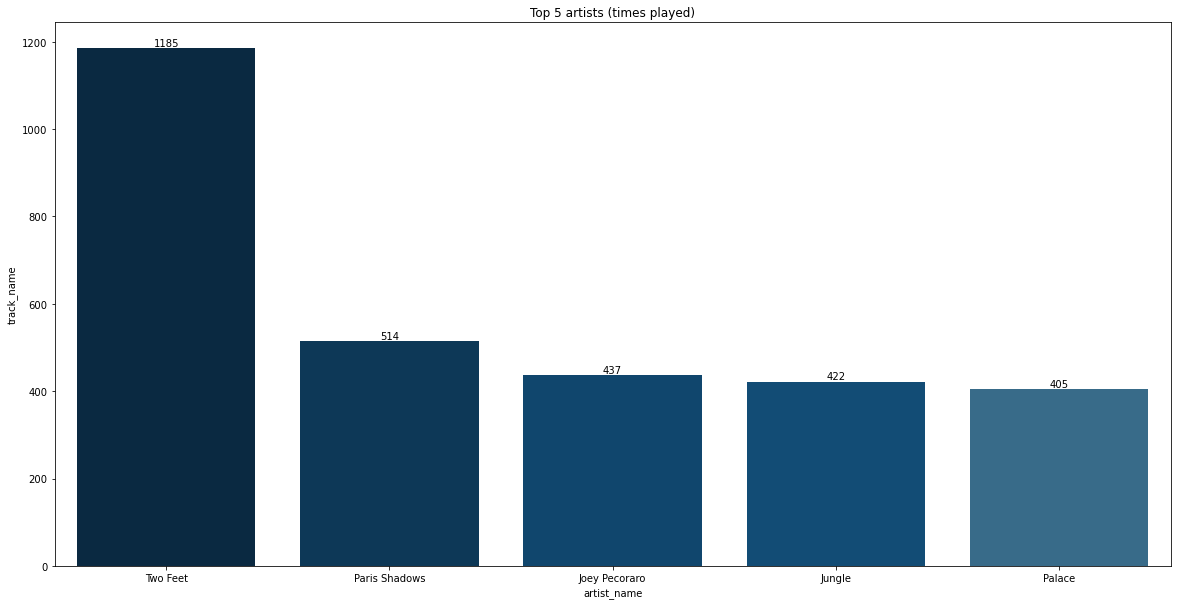

In [56]:
plt.figure(figsize = (20,10))
plt.title(f'Top 5 artists (times played)')
ax = sns.barplot(data = top_artists, x = top_artists.index, y = 'track_name', palette = palette_2)
ax.bar_label(ax.containers[0])
plt.show()

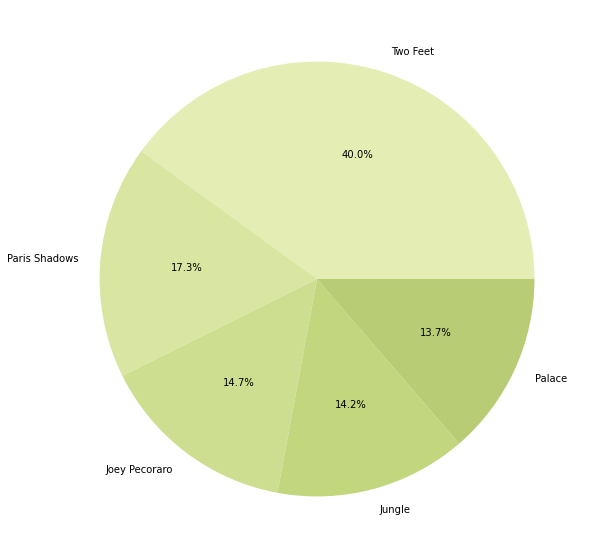

In [57]:
plt.figure(figsize = (15,10))
plt.pie(top_artists['track_name'], labels = top_artists.index, colors = pal_test, autopct='%1.1f%%')
plt.show()

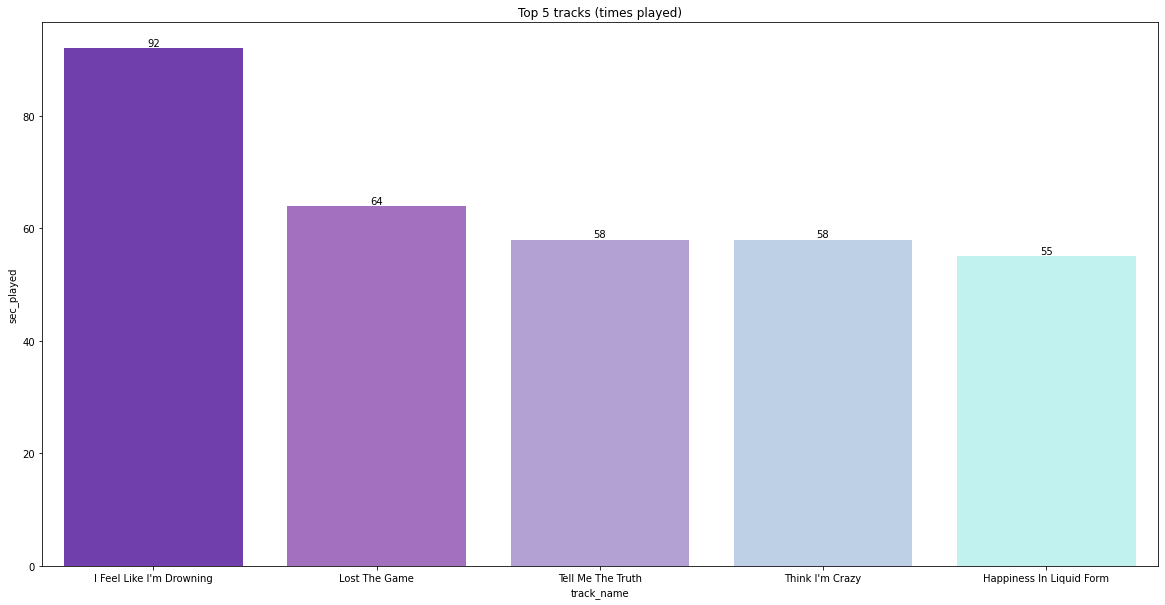

In [65]:
plt.figure(figsize = (20,10))
plt.title(f'Top 5 tracks (times played)')
ax = sns.barplot(data = top_tracks, x = top_tracks.index, y = 'sec_played', palette = pl_4)
ax.bar_label(ax.containers[0])
plt.show()

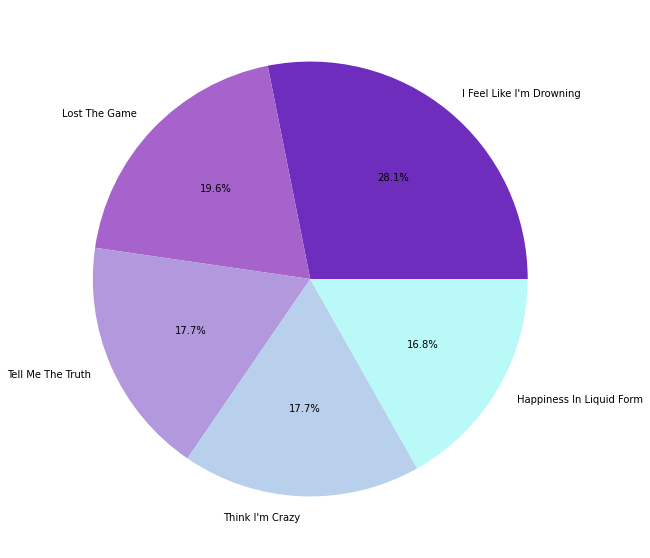

In [64]:
plt.figure(figsize = (15,10))
plt.pie(top_tracks['sec_played'], labels = top_tracks.index, colors = pl_4, autopct='%1.1f%%')
plt.show()